In [62]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [63]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()

In [64]:
X_train.shape

(50000, 32, 32, 3)

In [65]:
X_test.shape

(10000, 32, 32, 3)

In [66]:
y_train.shape

(50000, 1)

In [67]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [68]:
y_train = y_train.reshape(-1,) # -1 not to change first parameter of shape of our data and ", " for applying the operation

In [69]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [70]:
y_train.shape

(50000,)

In [71]:
y_test = y_test.reshape(-1,)

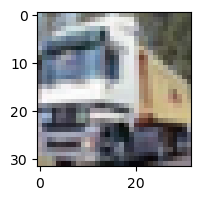

In [72]:
plt.figure(figsize=(15,2)) # to minimised the size of image
plt.imshow(X_train[1])

In [73]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","truck","ship"]

In [74]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

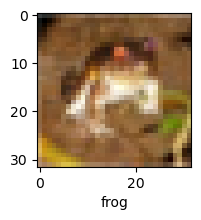

In [75]:
plot_sample(X_train,y_train,0)

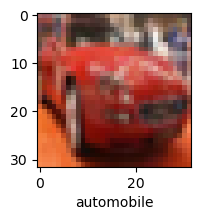

In [76]:
plot_sample(X_train,y_train,5)

In [77]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [78]:
X_train = X_train/255  # to bring the colour range from (0 to 255) to (0 to 1)
X_test = X_test/255

In [79]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [80]:
ann = models.Sequential([
    #dense neural network
    layers.Flatten(input_shape=(32,32,3)), #flatten layer is the first layer which accepts the input of 32*32*3
    layers.Dense(3000, activation='relu'), #deep layer having 3000 neurons
    layers.Dense(1000, activation='relu'), #deep layer having 3000 neurons
    layers.Dense(10, activation='sigmoid') #last layer having 10 catedories for 10 classes in our dataset
])

In [81]:
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [82]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 124s 73ms/step - loss: 1.8105 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.6231 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.5408 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4804 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 118s 76ms/step - loss: 1.4307 - accuracy: 0.4971


In [83]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 12s 19ms/step - loss: 1.5683 - accuracy: 0.4485


[1.568253755569458, 0.44850000739097595]

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classsification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 12s 17ms/step
Classsification Report: 
               precision    recall  f1-score   support

           0       0.54      0.48      0.51      1000
           1       0.73      0.50      0.59      1000
           2       0.38      0.28      0.32      1000
           3       0.36      0.27      0.31      1000
           4       0.28      0.64      0.39      1000
           5       0.51      0.24      0.33      1000
           6       0.48      0.56      0.51      1000
           7       0.39      0.66      0.49      1000
           8       0.67      0.52      0.58      1000
           9       0.68      0.34      0.45      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.45     10000
weighted avg       0.50      0.45      0.45     10000



In [86]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), #convolution layer 
    #(used for detecting the features) here 32 filters of 3*3size
    layers.MaxPooling2D((2,2)), # max pooling layer
    
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), #convolution layer 
    layers.MaxPooling2D((2,2)), # max pooling layer
    
    #dense neural network
    layers.Flatten(), # we don't need to specify the shape of input in middle layers
    layers.Dense(64, activation='relu'), #deep layer having 3000 neurons
    layers.Dense(10, activation='softmax') #last layer having 10 catedories for 10 classes in our dataset
])

In [88]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [96]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 38s 20ms/step - loss: 1.4991 - accuracy: 0.4593
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1807 - accuracy: 0.5833
Epoch 3/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0641 - accuracy: 0.6269
Epoch 4/5
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9858 - accuracy: 0.6566
Epoch 5/5
1563/1563 [==============================] - 38s 25ms/step - loss: 0.9305 - accuracy: 0.6759


In [97]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 8s 9ms/step - loss: 0.9623 - accuracy: 0.6644


[0.9622977375984192, 0.6643999814987183]

In [98]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 8s 9ms/step


array([[7.6078549e-03, 2.8949354e-03, 8.3024940e-03, 7.7274257e-01,
        7.0462050e-03, 7.2358169e-02, 1.5529614e-02, 7.5523189e-04,
        1.0492115e-01, 7.8416960e-03],
       [2.8765842e-02, 2.2623715e-01, 5.3417960e-05, 1.5855720e-05,
        1.7801853e-05, 2.2838832e-07, 1.4558449e-07, 2.4962823e-05,
        7.3701257e-01, 7.8719622e-03],
       [6.3685670e-02, 4.2049076e-02, 1.5097513e-03, 3.7378094e-03,
        8.2844874e-04, 4.2655887e-04, 5.5389554e-04, 1.3998611e-03,
        8.6529601e-01, 2.0512903e-02],
       [8.8704765e-01, 1.9140841e-02, 1.5685530e-02, 1.1098743e-03,
        1.3204801e-02, 3.5214125e-05, 6.2142103e-04, 7.2594376e-05,
        6.2441658e-02, 6.4040156e-04],
       [1.1292511e-04, 2.4071215e-04, 2.8099602e-02, 6.2033210e-02,
        5.9151691e-01, 3.1938744e-03, 3.1391194e-01, 4.4981157e-04,
        3.7278867e-04, 6.8274465e-05]], dtype=float32)

In [99]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[3, 8, 8, 0, 4]

In [100]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [101]:
print("Classsification Report: \n", classification_report(y_test, y_pred_classes))

Classsification Report: 
               precision    recall  f1-score   support

           0       0.70      0.73      0.72      1000
           1       0.83      0.73      0.78      1000
           2       0.49      0.60      0.54      1000
           3       0.51      0.45      0.48      1000
           4       0.62      0.57      0.59      1000
           5       0.62      0.52      0.57      1000
           6       0.75      0.74      0.74      1000
           7       0.72      0.72      0.72      1000
           8       0.73      0.81      0.77      1000
           9       0.69      0.78      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

